## Import Library & Dataset

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/fernandomichael17/data/refs/heads/main/CarPrice_Assignment.csv')
df

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


# Data Exploration

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [ ]:
print('Ukuran data : ', df.shape)
print('Jumlah Baris : ', df.shape[0])
print('Jumlah Kolom : ', df.shape[1])

Ukuran data :  (205, 26)
Jumlah Baris :  205
Jumlah Kolom :  26


In [ ]:
df.isnull().sum()

,0
car_ID,0
symboling,0
CarName,0
fueltype,0
aspiration,0
doornumber,0
carbody,0
drivewheel,0
enginelocation,0
wheelbase,0


In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
df.describe(include='all')

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205,205,205,205,205,205,205,205.000000,...,205.000000,205,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
unique,NaN,NaN,147,2,2,2,5,3,2,NaN,...,NaN,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,peugeot 504,gas,std,four,sedan,fwd,front,NaN,...,NaN,mpfi,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,6,185,168,115,96,120,202,NaN,...,NaN,94,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,103.000000,0.834146,NaN,NaN,NaN,NaN,NaN,NaN,NaN,98.756585,...,126.907317,NaN,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.021776,...,41.642693,NaN,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,86.600000,...,61.000000,NaN,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,94.500000,...,97.000000,NaN,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,97.000000,...,120.000000,NaN,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,102.400000,...,141.000000,NaN,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000


# Data Pre-processing

In [ ]:
df_new = df.drop(['car_ID', 'symboling'], axis=1)
df_new

,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,188.8,68.9,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,188.8,68.8,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,188.8,68.9,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


In [ ]:
df['CarName'].unique()

array(['alfa-romero giulia', 'alfa-romero stelvio',
       'alfa-romero Quadrifoglio', 'audi 100 ls', 'audi 100ls',
       'audi fox', 'audi 5000', 'audi 4000', 'audi 5000s (diesel)',
       'bmw 320i', 'bmw x1', 'bmw x3', 'bmw z4', 'bmw x4', 'bmw x5',
       'chevrolet impala', 'chevrolet monte carlo', 'chevrolet vega 2300',
       'dodge rampage', 'dodge challenger se', 'dodge d200',
       'dodge monaco (sw)', 'dodge colt hardtop', 'dodge colt (sw)',
       'dodge coronet custom', 'dodge dart custom',
       'dodge coronet custom (sw)', 'honda civic', 'honda civic cvcc',
       'honda accord cvcc', 'honda accord lx', 'honda civic 1500 gl',
       'honda accord', 'honda civic 1300', 'honda prelude',
       'honda civic (auto)', 'isuzu MU-X', 'isuzu D-Max ',
       'isuzu D-Max V-Cross', 'jaguar xj', 'jaguar xf', 'jaguar xk',
       'maxda rx3', 'maxda glc deluxe', 'mazda rx2 coupe', 'mazda rx-4',
       'mazda glc deluxe', 'mazda 626', 'mazda glc', 'mazda rx-7 gs',
       'mazda glc 

In [ ]:
df_new['compName'] = df['CarName'].apply(lambda x: x.split(' ')[0])
df_new = df_new.drop('CarName', axis=1)
df_new

,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,compName
0,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,...,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero
1,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,...,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero
2,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,...,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero
3,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,...,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,audi
4,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,...,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,audi
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,55.5,...,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0,volvo
201,gas,turbo,four,sedan,rwd,front,109.1,188.8,68.8,55.5,...,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0,volvo
202,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,55.5,...,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0,volvo
203,diesel,turbo,four,sedan,rwd,front,109.1,188.8,68.9,55.5,...,idi,3.01,3.40,23.0,106,4800,26,27,22470.0,volvo


In [ ]:
df_new['compName'].value_counts()

,count
compName,
toyota,31
nissan,17
mazda,15
honda,13
mitsubishi,13
subaru,12
volvo,11
peugeot,11
dodge,9


In [ ]:
df_new['compName'].replace(['maxda', 'Nissan ', 'porcshce', 'toyouta', 'vokswagen', 'vw', 'Nissan'],
                        ['mazda', 'nissan', 'porsche', 'toyota', 'volkswagen', 'volkswagen', 'nissan'], inplace=True)

In [ ]:
df_new['compName'].value_counts()

,count
compName,
toyota,32
nissan,18
mazda,17
mitsubishi,13
honda,13
subaru,12
volkswagen,12
volvo,11
peugeot,11


In [ ]:
numerical_features = df_new.select_dtypes(exclude=['object'])
categorical_features = df_new.select_dtypes(include=['object'])

In [ ]:
q1 = numerical_features.quantile(0.25)
q3 = numerical_features.quantile(0.75)
iqr = q3 - q1

# Melihat batas bawah
batas_bawah = q1 - (1.5 * iqr)
batas_bawah

# Melihat batas atas
batas_atas = q3 + (1.5 * iqr)
batas_atas

# Filter outlier pada dataset dengan batas bawah dan atas
outlier_filter = ((numerical_features < batas_bawah) | (numerical_features > batas_atas))
outlier_filter.sample(30)

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
125,False,False,False,False,False,False,False,False,False,False,False,False,False,False
142,False,False,False,False,False,False,False,True,False,False,False,False,False,False
63,False,False,False,False,False,False,False,False,True,False,False,False,False,False
170,False,False,False,False,False,False,False,False,False,False,False,False,False,False
137,False,False,False,False,False,False,False,False,False,False,False,False,False,False
113,False,False,False,False,False,False,False,True,False,False,False,False,False,False
82,False,False,False,False,False,False,False,False,True,False,False,False,False,False
182,False,False,False,False,False,False,False,False,True,False,False,False,False,False
127,False,False,False,False,False,False,False,False,False,True,False,False,False,True
52,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
# Menghitung Jumlah Outlier Pada Data
for col in outlier_filter.columns :
    print('Nama Kolom:',col)
    print(outlier_filter[col].value_counts())
    print('-------------------')

Nama Kolom: wheelbase
wheelbase
False    202
True       3
Name: count, dtype: int64
-------------------
Nama Kolom: carlength
carlength
False    204
True       1
Name: count, dtype: int64
-------------------
Nama Kolom: carwidth
carwidth
False    197
True       8
Name: count, dtype: int64
-------------------
Nama Kolom: carheight
carheight
False    205
Name: count, dtype: int64
-------------------
Nama Kolom: curbweight
curbweight
False    205
Name: count, dtype: int64
-------------------
Nama Kolom: enginesize
enginesize
False    195
True      10
Name: count, dtype: int64
-------------------
Nama Kolom: boreratio
boreratio
False    205
Name: count, dtype: int64
-------------------
Nama Kolom: stroke
stroke
False    185
True      20
Name: count, dtype: int64
-------------------
Nama Kolom: compressionratio
compressionratio
False    177
True      28
Name: count, dtype: int64
-------------------
Nama Kolom: horsepower
horsepower
False    199
True       6
Name: count, dtype: int64
-------

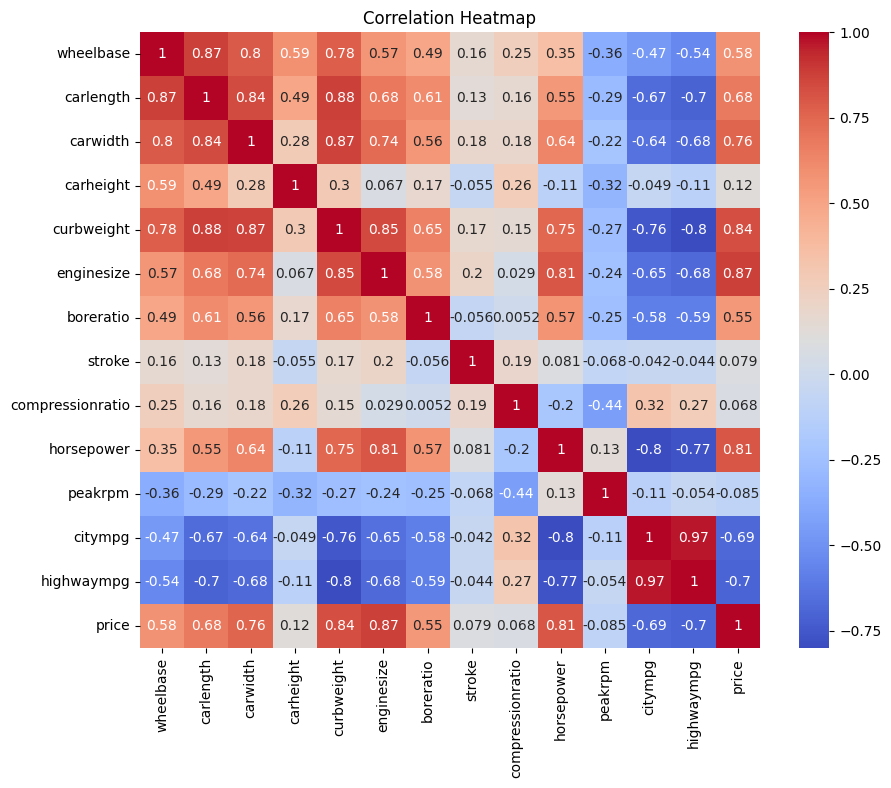

In [ ]:
# Correlation Analysis
correlation_matrix = numerical_features.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
high_corr_features = correlation_matrix[
    (correlation_matrix['price'] > 0.6) | (correlation_matrix['price'] < -0.6)
].index.tolist()
if 'price' in high_corr_features:
    high_corr_features.remove('price')

print("Fitur dengan korelasi terhadap 'price' yang lebih dari 0.6 atau kurang dari -0.6 (selain 'price'):")
for feature in high_corr_features:
    print(f"- {feature}: {correlation_matrix.loc[feature, 'price']:.2f}")

Fitur dengan korelasi terhadap 'price' yang lebih dari 0.6 atau kurang dari -0.6 (selain 'price'):
- carlength: 0.68
- carwidth: 0.76
- curbweight: 0.84
- enginesize: 0.87
- horsepower: 0.81
- citympg: -0.69
- highwaympg: -0.70


In [ ]:
high_corr_among_features = correlation_matrix.unstack()
high_corr_among_features = high_corr_among_features[
    ((high_corr_among_features > 0.6) | (high_corr_among_features < -0.6)) & (high_corr_among_features < 1.0)
]

print("\nPasangan fitur dengan korelasi lebih dari 0.6 atau kurang dari -0.6 (selain 'price'):")
for (feature1, feature2), correlation in high_corr_among_features.items():
    # Pastikan kedua fitur bukan 'price'
    if feature1 != 'price' and feature2 != 'price':
        print(f"- {feature1} dan {feature2}: {correlation:.2f}")


Pasangan fitur dengan korelasi lebih dari 0.6 atau kurang dari -0.6 (selain 'price'):
- wheelbase dan carlength: 0.87
- wheelbase dan carwidth: 0.80
- wheelbase dan curbweight: 0.78
- carlength dan wheelbase: 0.87
- carlength dan carwidth: 0.84
- carlength dan curbweight: 0.88
- carlength dan enginesize: 0.68
- carlength dan boreratio: 0.61
- carlength dan citympg: -0.67
- carlength dan highwaympg: -0.70
- carwidth dan wheelbase: 0.80
- carwidth dan carlength: 0.84
- carwidth dan curbweight: 0.87
- carwidth dan enginesize: 0.74
- carwidth dan horsepower: 0.64
- carwidth dan citympg: -0.64
- carwidth dan highwaympg: -0.68
- curbweight dan wheelbase: 0.78
- curbweight dan carlength: 0.88
- curbweight dan carwidth: 0.87
- curbweight dan enginesize: 0.85
- curbweight dan boreratio: 0.65
- curbweight dan horsepower: 0.75
- curbweight dan citympg: -0.76
- curbweight dan highwaympg: -0.80
- enginesize dan carlength: 0.68
- enginesize dan carwidth: 0.74
- enginesize dan curbweight: 0.85
- eng

Perhatikan bahwa beberapa fitur prediktor juga sangat berkorelasi satu sama lain. Contohnya:

carlength dan wheelbase (0.88)

carwidth dan enginesize (0.74)

curbweight sangat berkorelasi dengan enginesize (0.85), horsepower (0.87), carwidth (0.83), carlength (0.88), dan wheelbase (0.78).

citympg dan highwaympg (0.97) - ini adalah korelasi yang sangat tinggi. Memasukkan keduanya mungkin menyebabkan masalah multikolinearitas.

## Feature Engineering

In [ ]:
df_new['avg_mpg'] = (df_new['citympg'] + df_new['highwaympg']) / 2
df_new.drop(['citympg', 'highwaympg'], axis=1, inplace=True)

In [ ]:
# Make new feature
df_new['size_index'] = df_new['carlength'] + df_new['carwidth'] + df_new['curbweight']
df_new.drop(['carlength', 'carwidth', 'curbweight'], axis=1, inplace=True)
display(df_new.head())

,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carheight,enginetype,cylindernumber,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,price,compName,avg_mpg,size_index
0,gas,std,two,convertible,rwd,front,88.6,48.8,dohc,four,...,mpfi,3.47,2.68,9.0,111,5000,13495.0,alfa-romero,24.0,2780.9
1,gas,std,two,convertible,rwd,front,88.6,48.8,dohc,four,...,mpfi,3.47,2.68,9.0,111,5000,16500.0,alfa-romero,24.0,2780.9
2,gas,std,two,hatchback,rwd,front,94.5,52.4,ohcv,six,...,mpfi,2.68,3.47,9.0,154,5000,16500.0,alfa-romero,22.5,3059.7
3,gas,std,four,sedan,fwd,front,99.8,54.3,ohc,four,...,mpfi,3.19,3.40,10.0,102,5500,13950.0,audi,27.0,2579.8
4,gas,std,four,sedan,4wd,front,99.4,54.3,ohc,five,...,mpfi,3.19,3.40,8.0,115,5500,17450.0,audi,20.0,3067.0


In [ ]:
df_new.drop('wheelbase', axis=1, inplace=True)
display(df_new.head())

,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,carheight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,price,compName,avg_mpg,size_index
0,gas,std,two,convertible,rwd,front,48.8,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,13495.0,alfa-romero,24.0,2780.9
1,gas,std,two,convertible,rwd,front,48.8,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,16500.0,alfa-romero,24.0,2780.9
2,gas,std,two,hatchback,rwd,front,52.4,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,16500.0,alfa-romero,22.5,3059.7
3,gas,std,four,sedan,fwd,front,54.3,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,13950.0,audi,27.0,2579.8
4,gas,std,four,sedan,4wd,front,54.3,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,17450.0,audi,20.0,3067.0


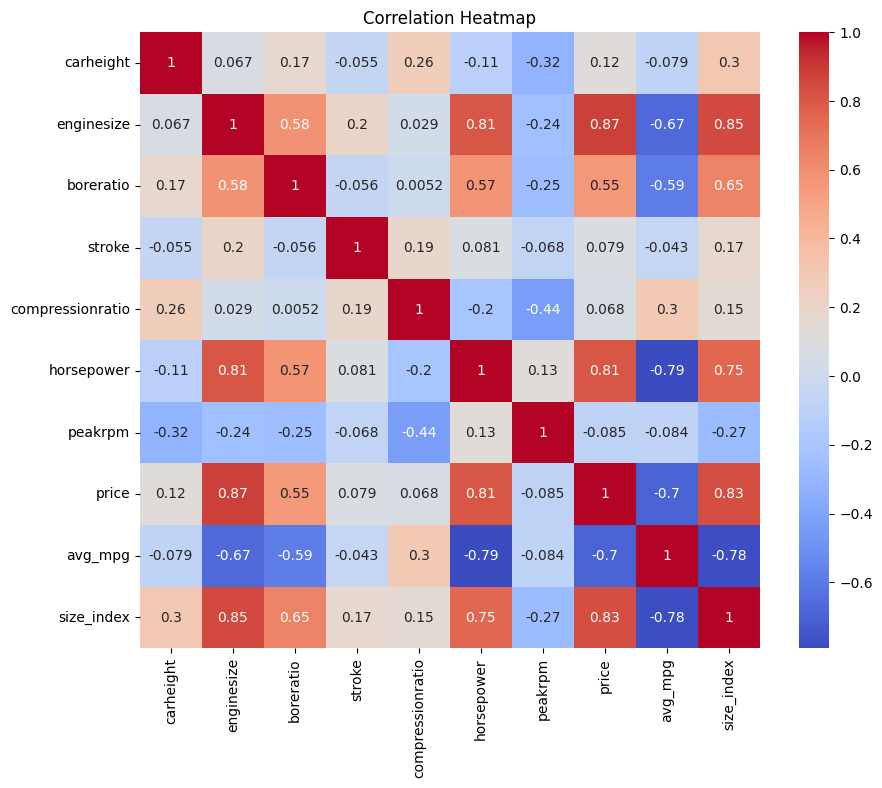

In [ ]:
# Correlation Analysis
correlation_matrix = df_new.select_dtypes(exclude='object').corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
high_corr_among_features = correlation_matrix.unstack()
high_corr_among_features = high_corr_among_features[
    ((high_corr_among_features > 0.6) | (high_corr_among_features < -0.6)) & (high_corr_among_features < 1.0)
]

print("\nPasangan fitur dengan korelasi lebih dari 0.6 atau kurang dari -0.6 (selain 'price'):")
for (feature1, feature2), correlation in high_corr_among_features.items():
    # Pastikan kedua fitur bukan 'price'
    if feature1 != 'price' and feature2 != 'price':
        print(f"- {feature1} dan {feature2}: {correlation:.2f}")


Pasangan fitur dengan korelasi lebih dari 0.6 atau kurang dari -0.6 (selain 'price'):
- enginesize dan horsepower: 0.81
- enginesize dan avg_mpg: -0.67
- enginesize dan size_index: 0.85
- boreratio dan size_index: 0.65
- horsepower dan enginesize: 0.81
- horsepower dan avg_mpg: -0.79
- horsepower dan size_index: 0.75
- avg_mpg dan enginesize: -0.67
- avg_mpg dan horsepower: -0.79
- avg_mpg dan size_index: -0.78
- size_index dan enginesize: 0.85
- size_index dan boreratio: 0.65
- size_index dan horsepower: 0.75
- size_index dan avg_mpg: -0.78


In [ ]:
high_corr_features = correlation_matrix[
    (correlation_matrix['price'] > 0.5) | (correlation_matrix['price'] < -0.5)
].index.tolist()
if 'price' in high_corr_features:
    high_corr_features.remove('price')

print("Fitur dengan korelasi terhadap 'price' yang lebih dari 0.5 atau kurang dari -0.5 (selain 'price'):")
for feature in high_corr_features:
    print(f"- {feature}: {correlation_matrix.loc[feature, 'price']:.2f}")

Fitur dengan korelasi terhadap 'price' yang lebih dari 0.5 atau kurang dari -0.5 (selain 'price'):
- enginesize: 0.87
- boreratio: 0.55
- horsepower: 0.81
- avg_mpg: -0.70
- size_index: 0.83


## Encoding

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Inisialisasi LabelEncoder
label_encoder = LabelEncoder()

# Iterasi melalui kolom kategorikal dan terapkan Label Encoding
for col in categorical_features.columns:
  df_new[col] = label_encoder.fit_transform(df_new[col])

# Tampilkan hasil
print(df_new.head())

   fueltype  aspiration  doornumber  carbody  drivewheel  enginelocation  \
0         1           0           1        0           2               0   
1         1           0           1        0           2               0   
2         1           0           1        2           2               0   
3         1           0           0        3           1               0   
4         1           0           0        3           0               0   

   carheight  enginetype  cylindernumber  enginesize  fuelsystem  boreratio  \
0       48.8           0               2         130           5       3.47   
1       48.8           0               2         130           5       3.47   
2       52.4           5               3         152           5       2.68   
3       54.3           3               2         109           5       3.19   
4       54.3           3               1         136           5       3.19   

   stroke  compressionratio  horsepower  peakrpm    price  compName 

## Normalization

In [ ]:
# Normalisasi Data
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_new)
df_scaled = pd.DataFrame(df_scaled, columns=df_new.columns)
print(df_scaled.head())

   fueltype  aspiration  doornumber   carbody  drivewheel  enginelocation  \
0  0.328798   -0.469295    1.130388 -3.050975    1.213330       -0.121867   
1  0.328798   -0.469295    1.130388 -3.050975    1.213330       -0.121867   
2  0.328798   -0.469295    1.130388 -0.717207    1.213330       -0.121867   
3  0.328798   -0.469295   -0.884652  0.449677   -0.589081       -0.121867   
4  0.328798   -0.469295   -0.884652  0.449677   -2.391492       -0.121867   

   carheight  enginetype  cylindernumber  enginesize  fuelsystem  boreratio  \
0  -2.020417   -2.865105       -0.147475    0.074449    0.869568   0.519071   
1  -2.020417   -2.865105       -0.147475    0.074449    0.869568   0.519071   
2  -0.543527    1.886890        1.112210    0.604046    0.869568  -2.404880   
3   0.235942   -0.013908       -0.147475   -0.431076    0.869568  -0.517266   
4   0.235942   -0.013908       -1.407161    0.218885    0.869568  -0.517266   

     stroke  compressionratio  horsepower   peakrpm     price 

## Model Training and Testing

In [ ]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, mean_absolute_percentage_error
import numpy as np

# Memisahkan fitur (X) dan target (y) dari df_new (data sebelum scaling)
X_original = df_new.drop('price', axis=1)
y_original = df_new['price']

# Membagi data asli menjadi training dan testing set (menggunakan random_state yang sama)
X_train_original, X_test_original, y_train_original, y_test_original = train_test_split(X_original, y_original, test_size=0.2, random_state=42)

# Memisahkan fitur (X) dan target (y) dari df_scaled (data setelah scaling)
X_scaled = df_scaled.drop('price', axis=1)
y_scaled = df_scaled['price']

# Membagi data scaled menjadi training dan testing set (menggunakan random_state yang sama)
X_train_scaled, X_test_scaled, y_train_scaled, y_test_scaled = train_test_split(X_scaled, y_scaled, test_size=0.2, random_state=42)


# Membuat dictionary untuk menyimpan model
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree Regressor": DecisionTreeRegressor(random_state=42),
    "Random Forest Regressor": RandomForestRegressor(n_estimators=100, random_state=42),
    "Gradient Boosting Regressor": GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42),
    "XGBoost Regressor": XGBRegressor(objective='reg:squarederror', n_estimators=100, learning_rate=0.1, random_state=42),
    "K-Nearest Neighbors Regressor": KNeighborsRegressor(n_neighbors=5),
    "Support Vector Regressor": SVR(kernel='rbf')
}

# Dictionary untuk menyimpan hasil evaluasi model
model_evaluation = {}

# Melatih dan mengevaluasi setiap model
for name, model in models.items():
    print(f"Training {name}...")
    # Melatih model pada data yang sudah diskalakan
    model.fit(X_train_scaled, y_train_scaled)
    # Membuat prediksi pada data test yang sudah diskalakan
    y_pred_scaled = model.predict(X_test_scaled)

    # Mengembalikan y_test_scaled dan y_pred_scaled ke skala asli untuk evaluasi
    # Karena scaler digunakan pada seluruh df_new, kita perlu membuat dummy DataFrame
    # untuk inverse transform y_test_scaled dan y_pred_scaled
    y_test_original_reshaped = y_test_scaled.values.reshape(-1, 1)
    y_pred_original_reshaped = y_pred_scaled.reshape(-1, 1)

    # Membuat dummy array dengan kolom sejumlah fitur + 1 (untuk kolom price)
    dummy_array_test = np.zeros((y_test_original_reshaped.shape[0], df_new.shape[1]))
    dummy_array_pred = np.zeros((y_pred_original_reshaped.shape[0], df_new.shape[1]))

    # Menempatkan nilai y_test_scaled dan y_pred_scaled pada kolom 'price' (kolom terakhir)
    price_col_index = df_new.columns.get_loc('price')
    dummy_array_test[:, price_col_index] = y_test_original_reshaped[:, 0]
    dummy_array_pred[:, price_col_index] = y_pred_original_reshaped[:, 0]

    # Melakukan inverse transform pada dummy array
    y_test_original_scale = scaler.inverse_transform(dummy_array_test)[:, price_col_index]
    y_pred_original_scale = scaler.inverse_transform(dummy_array_pred)[:, price_col_index]


    # Evaluasi Model pada skala asli
    mse = mean_squared_error(y_test_original_scale, y_pred_original_scale)
    mae = mean_absolute_error(y_test_original_scale, y_pred_original_scale)
    rmse = np.sqrt(mse)
    # Handle potential division by zero in MAPE if y_test_original_scale contains zero
    mape = mean_absolute_percentage_error(y_test_original_scale, y_pred_original_scale) * 100 if np.all(y_test_original_scale != 0) else float('inf')
    r2 = r2_score(y_test_original_scale, y_pred_original_scale)

    model_evaluation[name] = {
        'MSE': mse,
        'MAE': mae,
        'RMSE': rmse,
        'MAPE': mape,
        'R2 Score': r2
    }
    print(f"Evaluation for {name} (Original Scale):")
    print(f"  MSE: {mse:.4f}")
    print(f"  MAE: {mae:.4f}")
    print(f"  RMSE: {rmse:.4f}")
    print(f"  MAPE: {mape:.4f}%")
    print(f"  R2 Score: {r2:.4f}")
    print("-" * 30)

# Menampilkan hasil evaluasi dalam bentuk tabel
evaluation_df = pd.DataFrame(model_evaluation).T
print("\nModel Evaluation Results (Original Scale):")
display(evaluation_df)

Training Linear Regression...
Evaluation for Linear Regression (Original Scale):
  MSE: 12030661.3604
  MAE: 2169.7985
  RMSE: 3468.5244
  MAPE: 18.2235%
  R2 Score: 0.8476
------------------------------
Training Decision Tree Regressor...
Evaluation for Decision Tree Regressor (Original Scale):
  MSE: 8195164.1752
  MAE: 2149.8984
  RMSE: 2862.7197
  MAPE: 15.1704%
  R2 Score: 0.8962
------------------------------
Training Random Forest Regressor...
Evaluation for Random Forest Regressor (Original Scale):
  MSE: 3755200.4544
  MAE: 1385.0327
  RMSE: 1937.8340
  MAPE: 10.3255%
  R2 Score: 0.9524
------------------------------
Training Gradient Boosting Regressor...
Evaluation for Gradient Boosting Regressor (Original Scale):
  MSE: 5336456.2398
  MAE: 1663.4908
  RMSE: 2310.0771
  MAPE: 11.2903%
  R2 Score: 0.9324
------------------------------
Training XGBoost Regressor...
Evaluation for XGBoost Regressor (Original Scale):
  MSE: 5360903.2058
  MAE: 1623.8237
  RMSE: 2315.3624
  MAPE:

,MSE,MAE,RMSE,MAPE,R2 Score
Linear Regression,1.203066e+07,2169.798452,3468.524378,18.223502,0.847605
Decision Tree Regressor,8.195164e+06,2149.898366,2862.719716,15.170357,0.896190
Random Forest Regressor,3.755200e+06,1385.032675,1937.833959,10.325542,0.952432
Gradient Boosting Regressor,5.336456e+06,1663.490821,2310.077107,11.290344,0.932402
XGBoost Regressor,5.360903e+06,1623.823709,2315.362435,11.078567,0.932092
K-Nearest Neighbors Regressor,2.199207e+07,2850.484561,4689.569881,16.723180,0.721422
Support Vector Regressor,1.120327e+07,2197.575934,3347.128786,18.245229,0.858086


Dari percobaan 7 model, diketahui untuk 3 model terbaij adalah Random Forest Regressor, Gradient Boosting Regressor, XGBosst Regressor. Sehingga ketiga model ini selanjutnya akan di fine tuning.

## Hyperparameter Tuning

In [ ]:
from sklearn.model_selection import GridSearchCV

# Definisikan parameter grid untuk setiap model
param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

param_grid_gb = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

param_grid_xgb = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'min_child_weight': [1, 3, 5],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0]
}

# Buat dictionary model dan parameter grid
models_to_tune = {
    "Random Forest Regressor": (RandomForestRegressor(random_state=42), param_grid_rf),
    "Gradient Boosting Regressor": (GradientBoostingRegressor(random_state=42), param_grid_gb),
    "XGBoost Regressor": (XGBRegressor(objective='reg:squarederror', random_state=42), param_grid_xgb)
}

# Dictionary untuk menyimpan hasil fine-tuning
tuned_model_evaluation = {}
best_models = {}

# Lakukan fine-tuning untuk setiap model
for name, (model, param_grid) in models_to_tune.items():
    print(f"Starting GridSearchCV for {name}...")

    # Inisialisasi GridSearchCV
    grid_search = GridSearchCV(estimator=model, param_grid=param_grid,
                               scoring='neg_mean_squared_error', # Menggunakan negative MSE untuk mencari nilai terendah
                               cv=5, n_jobs=-1, verbose=2)

    # Lakukan fitting pada data training yang sudah diskalakan
    grid_search.fit(X_train_scaled, y_train_scaled)

    # Simpan model terbaik dan parameter terbaik
    best_models[name] = grid_search.best_estimator_
    print(f"Best parameters for {name}: {grid_search.best_params_}")
    print(f"Best cross-validation score (negative MSE) for {name}: {grid_search.best_score_}")

    # Evaluasi model terbaik pada data test yang sudah diskalakan
    y_pred_scaled = best_models[name].predict(X_test_scaled)

    # Mengembalikan y_test_scaled dan y_pred_scaled ke skala asli untuk evaluasi
    y_test_original_reshaped = y_test_scaled.values.reshape(-1, 1)
    y_pred_original_reshaped = y_pred_scaled.reshape(-1, 1)

    dummy_array_test = np.zeros((y_test_original_reshaped.shape[0], df_new.shape[1]))
    dummy_array_pred = np.zeros((y_pred_original_reshaped.shape[0], df_new.shape[1]))

    price_col_index = df_new.columns.get_loc('price')
    dummy_array_test[:, price_col_index] = y_test_original_reshaped[:, 0]
    dummy_array_pred[:, price_col_index] = y_pred_original_reshaped[:, 0]

    y_test_original_scale = scaler.inverse_transform(dummy_array_test)[:, price_col_index]
    y_pred_original_scale = scaler.inverse_transform(dummy_array_pred)[:, price_col_index]

    # Evaluasi Model pada skala asli
    mse = mean_squared_error(y_test_original_scale, y_pred_original_scale)
    mae = mean_absolute_error(y_test_original_scale, y_pred_original_scale)
    rmse = np.sqrt(mse)
    mape = mean_absolute_percentage_error(y_test_original_scale, y_pred_original_scale) * 100 if np.all(y_test_original_scale != 0) else float('inf')
    r2 = r2_score(y_test_original_scale, y_pred_original_scale)


    tuned_model_evaluation[name] = {
        'Best Parameters': grid_search.best_params_,
        'MSE': mse,
        'MAE': mae,
        'RMSE': rmse,
        'MAPE': mape,
        'R2 Score': r2
    }
    print(f"Evaluation for Tuned {name} (Original Scale):")
    print(f"  MSE: {mse:.4f}")
    print(f"  MAE: {mae:.4f}")
    print(f"  RMSE: {rmse:.4f}")
    print(f"  MAPE: {mape:.4f}%")
    print(f"  R2 Score: {r2:.4f}")
    print("-" * 30)

# Menampilkan hasil evaluasi model yang telah di-fine-tune dalam bentuk tabel
tuned_evaluation_df = pd.DataFrame(tuned_model_evaluation).T
print("\nTuned Model Evaluation Results (Original Scale):")
display(tuned_evaluation_df)


Starting GridSearchCV for Random Forest Regressor...
Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best parameters for Random Forest Regressor: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Best cross-validation score (negative MSE) for Random Forest Regressor: -0.08730618780906223
Evaluation for Tuned Random Forest Regressor (Original Scale):
  MSE: 3771994.6571
  MAE: 1388.0907
  RMSE: 1942.1624
  MAPE: 10.3297%
  R2 Score: 0.9522
------------------------------
Starting GridSearchCV for Gradient Boosting Regressor...
Fitting 5 folds for each of 243 candidates, totalling 1215 fits
Best parameters for Gradient Boosting Regressor: {'learning_rate': 0.2, 'max_depth': 3, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 100}
Best cross-validation score (negative MSE) for Gradient Boosting Regressor: -0.07419066519302764
Evaluation for Tuned Gradient Boosting Regressor (Original Scale):
  MSE: 5267615.7366
  MAE: 1585.2

,Best Parameters,MSE,MAE,RMSE,MAPE,R2 Score
Random Forest Regressor,"{'max_depth': 10, 'min_samples_leaf': 1, 'min_...",3771994.657082,1388.090657,1942.162366,10.329731,0.952219
Gradient Boosting Regressor,"{'learning_rate': 0.2, 'max_depth': 3, 'min_sa...",5267615.736624,1585.2793,2295.128697,10.818565,0.933274
XGBoost Regressor,"{'colsample_bytree': 0.8, 'learning_rate': 0.2...",6161664.946105,1704.007042,2482.270119,11.767295,0.921949


## Comparisson


Comparison of Model Performance Before and After Fine-Tuning:


,Model,Type,MSE,MAE,RMSE,MAPE,R2 Score
8,Gradient Boosting Regressor,After Tuning,5.267616e+06,1585.279300,2295.128697,10.818565,0.933274
3,Gradient Boosting Regressor,Before Tuning,5.336456e+06,1663.490821,2310.077107,11.290344,0.932402
7,Random Forest Regressor,After Tuning,3.771995e+06,1388.090657,1942.162366,10.329731,0.952219
2,Random Forest Regressor,Before Tuning,3.755200e+06,1385.032675,1937.833959,10.325542,0.952432
9,XGBoost Regressor,After Tuning,6.161665e+06,1704.007042,2482.270119,11.767295,0.921949
4,XGBoost Regressor,Before Tuning,5.360903e+06,1623.823709,2315.362435,11.078567,0.932092


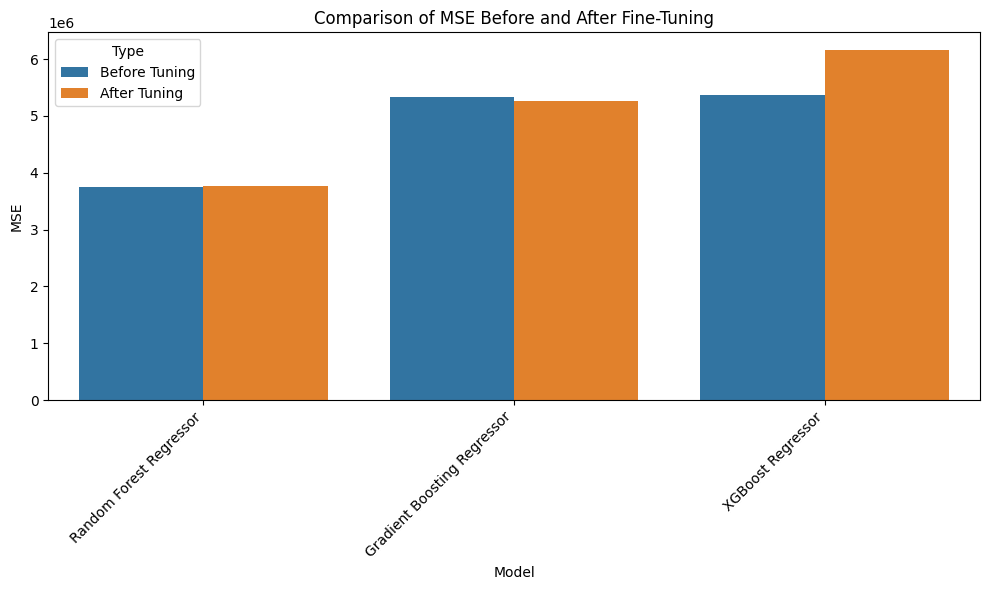

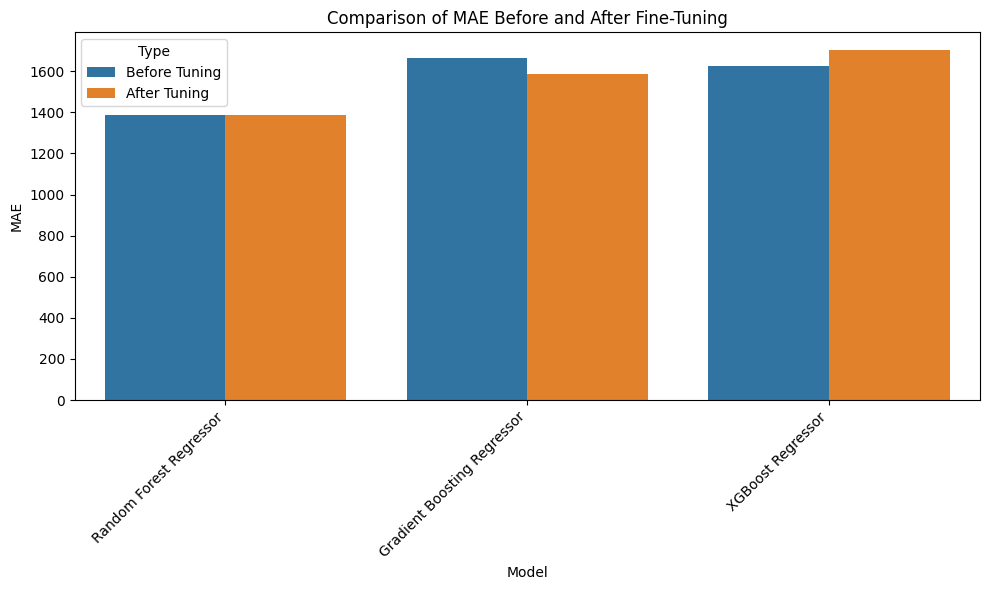

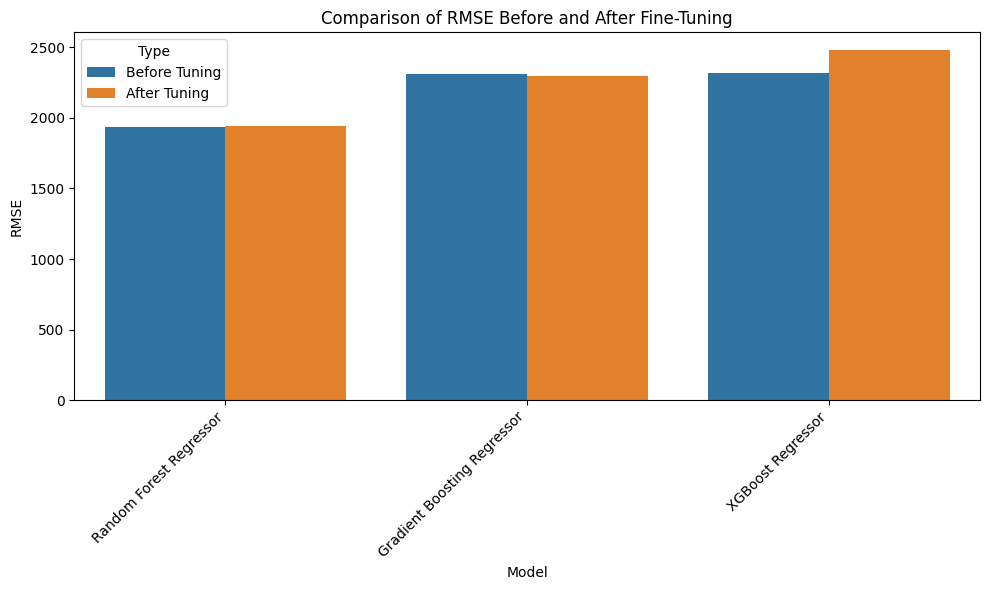

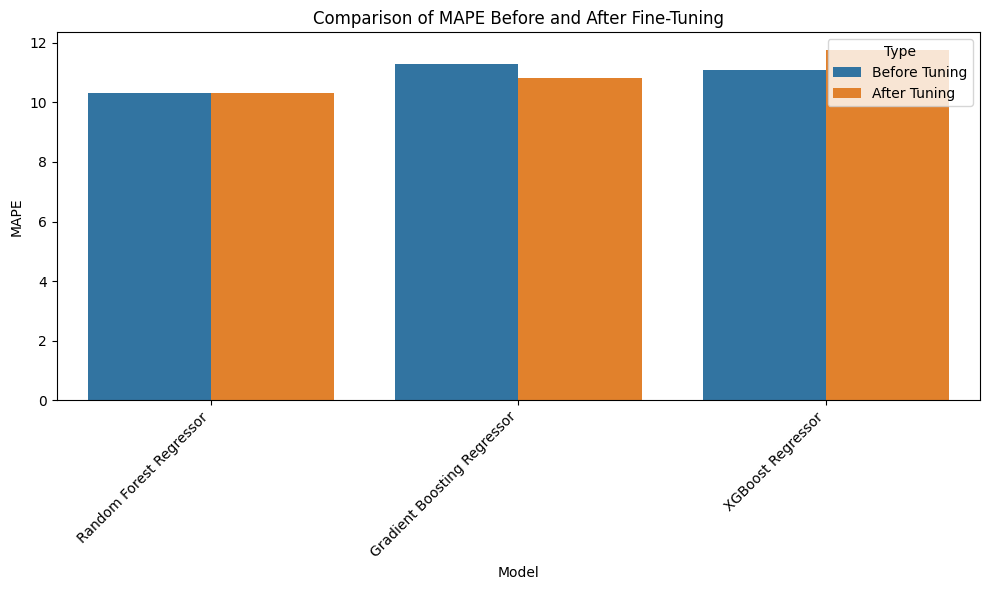

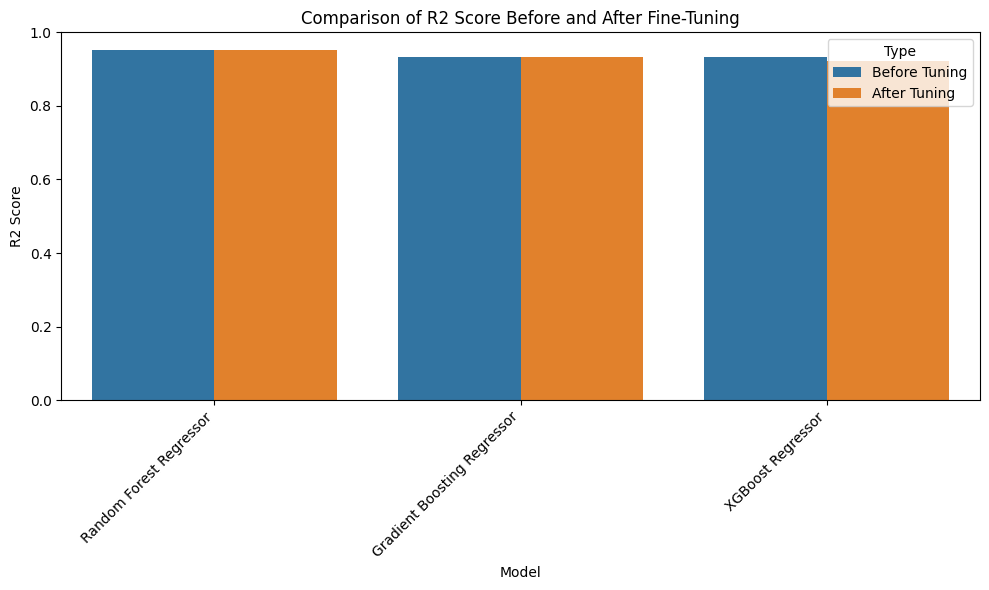

In [ ]:
# Bandingkan hasil sebelum dan sesudah fine-tuning
comparison_df = pd.DataFrame({
    'Model': evaluation_df.index.tolist() + tuned_evaluation_df.index.tolist(),
    'Type': ['Before Tuning'] * len(evaluation_df) + ['After Tuning'] * len(tuned_evaluation_df),
    'MSE': evaluation_df['MSE'].tolist() + tuned_evaluation_df['MSE'].tolist(),
    'MAE': evaluation_df['MAE'].tolist() + tuned_evaluation_df['MAE'].tolist(),
    'RMSE': evaluation_df['RMSE'].tolist() + tuned_evaluation_df['RMSE'].tolist(),
    'MAPE': evaluation_df['MAPE'].tolist() + tuned_evaluation_df['MAPE'].tolist(),
    'R2 Score': evaluation_df['R2 Score'].tolist() + tuned_evaluation_df['R2 Score'].tolist()
})

# Filter hanya model yang di-fine-tune untuk perbandingan langsung
comparison_df_filtered = comparison_df[comparison_df['Model'].isin(models_to_tune.keys())].copy()

# Tampilkan tabel perbandingan
print("\nComparison of Model Performance Before and After Fine-Tuning:")
display(comparison_df_filtered.sort_values(by=['Model', 'Type']))

# Visualisasi perbandingan metrik
metrics_to_compare = ['MSE', 'MAE', 'RMSE', 'MAPE', 'R2 Score']

for metric in metrics_to_compare:
    plt.figure(figsize=(10, 6))
    sns.barplot(x='Model', y=metric, hue='Type', data=comparison_df_filtered)
    plt.title(f'Comparison of {metric} Before and After Fine-Tuning')
    plt.ylabel(metric)
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

## Integration

In [ ]:
import joblib

# Tentukan metrik yang digunakan untuk menentukan model terbaik (misalnya, R2 Score, semakin tinggi semakin baik)
metric_to_evaluate = 'R2 Score'

# Cari model terbaik berdasarkan metrik yang dipilih
best_model_name = None
best_metric_value = -float('inf') if metric_to_evaluate == 'R2 Score' else float('inf') # Inisialisasi dengan nilai terburuk

print(f"\nDetermining the best model based on {metric_to_evaluate}...")
for name, metrics in tuned_model_evaluation.items():
    current_metric_value = metrics[metric_to_evaluate]
    print(f"- {name}: {metric_to_evaluate} = {current_metric_value:.4f}")

    # Perbarui model terbaik jika metrik saat ini lebih baik
    if metric_to_evaluate == 'R2 Score': # Lebih tinggi lebih baik
        if current_metric_value > best_metric_value:
            best_metric_value = current_metric_value
            best_model_name = name
    else: # Lebih rendah lebih baik (MSE, MAE, RMSE, MAPE)
        if current_metric_value < best_metric_value:
            best_metric_value = current_metric_value
            best_model_name = name

print(f"\nBest model is: {best_model_name} with {metric_to_evaluate} = {best_metric_value:.4f}")

# Ambil objek model terbaik dari dictionary best_models
final_best_model = best_models[best_model_name]

# Simpan model terbaik ke dalam file menggunakan joblib
model_filename = f'best_model_{best_model_name.replace(" ", "_").lower()}.pkl'
joblib.dump(final_best_model, model_filename)

print(f"\nBest model saved to {model_filename}")

# Anda juga mungkin ingin menyimpan scaler yang digunakan untuk pre-processing
scaler_filename = 'scaler.pkl'
joblib.dump(scaler, scaler_filename)
print(f"Scaler saved to {scaler_filename}")

# Dan mungkin juga label_encoder jika ada data kategorikal yang perlu di-inverse transform nanti
label_encoder_filename = 'label_encoder.pkl'
joblib.dump(label_encoder, label_encoder_filename)
print(f"Label Encoder saved to {label_encoder_filename}")

# Untuk mengunduh file-file ini (jika menggunakan Colab)
try:
    files.download(model_filename)
    files.download(scaler_filename)
    files.download(label_encoder_filename)
except NameError:
    print("\nCould not download files. Ensure you are running this in Google Colab or have the 'files' module available.")
except Exception as e:
    print(f"\nAn error occurred during file download: {e}")


Determining the best model based on R2 Score...
- Random Forest Regressor: R2 Score = 0.9522
- Gradient Boosting Regressor: R2 Score = 0.9333
- XGBoost Regressor: R2 Score = 0.9219

Best model is: Random Forest Regressor with R2 Score = 0.9522

Best model saved to best_model_random_forest_regressor.pkl
Scaler saved to scaler.pkl
Label Encoder saved to label_encoder.pkl

Could not download files. Ensure you are running this in Google Colab or have the 'files' module available.
